In [1]:
from spikeforest2_utils import AutoRecordingExtractor, AutoSortingExtractor
import kachery as ka
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import json
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [ ]:
#import SpikeSortingPipeline as ssp

In [ ]:
#help(ssp)

In [ ]:
#recording = ssp.createRecordingList()

In [2]:
def createRecordingList():  
    
    # Returns a List.
    
    return list()

def addRecording(recordings,recording_name,recording,sorting_true):
    
    # Input: 
        #recordings is a list
        #recording_name is a string, must be in Format "recording_x" with x a number. 
        #                If you add recordings count up from 0
        #recording is an RecordingExtractor
        #sorting_true is Ground Truth Data
        
    # Output is the recording list with added recording
    
    recordings.append([recording_name,recording,sorting_true])
    return recordings

def loadSpikeForestRecordings(recordings,json_file_path,json_file_name,download,number_of_rec):  
    
    # Input
        #recordings 
        #json_file_path in the spikeforest_recordings folder
        #json_file_name is the name of the json file
        #download  True or False, depends if you want to download the recordings
        #number_of_rec is the number of recordings you want to get of the json file
    
    # loads the SpikeForestRecordings registered in the json file from top to bottom
    
    # Output is the recording list with all SpikeForest Recordings you selected
    
    ka.set_config(fr='default_readonly')   
    json_file = open(json_file_path+json_file_name)
    data = json.load(json_file)  
    
    recording_name = "recording_"
    count_recording = len(recordings)
    for rec in data["recordings"][:number_of_rec]:
        recording = AutoRecordingExtractor(rec['directory'],download=download)
        sorting_true = AutoSortingExtractor(rec['firingsTrue'])
        recordings = addRecording(recordings,recording_name+str(count_recording),recording,sorting_true)   
        count_recording += 1
    return recordings

def printRecordingData(recordings):   
    
    # Input is an recording list
    
    # Prints Channel Id, Sampling Frequency and the Number of Channel of all Recordings registered
    
    for rec in recordings:  
        
        print(rec[0])
        recording = rec[1]
        channel_ids = recording.get_channel_ids()
        fs = recording.get_sampling_frequency()
        num_chan = recording.get_num_channels()

        print('Channel ids:', channel_ids)
        print('Sampling frequency:', fs)
        print('Number of channels:', num_chan)
    
        sorting_true = rec[2]
        unit_ids = sorting_true.get_unit_ids()
        spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

        print('Unit ids:', unit_ids)
        print('Spike train of first unit:', spike_train, "\n")

In [3]:
# Load SpikeForest Recordings
json_file_path = "spikeforest_recordings/recordings/SYNTH_MAGLAND/synth_magland_noise10_K10_C4"
json_file_name = "/synth_magland_noise10_K10_C4.json"

recordings = createRecordingList()
recordings = loadSpikeForestRecordings(recordings,json_file_path,json_file_name, True ,2)

print(recordings, "\n")
printRecordingData(recordings)

[['recording_0', <spikeforest2_utils.autoextractors.autorecordingextractor.AutoRecordingExtractor object at 0x000002A5ED40EB50>, <spikeforest2_utils.autoextractors.autosortingextractor.AutoSortingExtractor object at 0x000002A5ED40E910>], ['recording_1', <spikeforest2_utils.autoextractors.autorecordingextractor.AutoRecordingExtractor object at 0x000002A6742789A0>, <spikeforest2_utils.autoextractors.autosortingextractor.AutoSortingExtractor object at 0x000002A6742789D0>]] 

recording_0
Channel ids: [0, 1, 2, 3]
Sampling frequency: 30000
Number of channels: 4
Unit ids: [ 1  2  3  4  5  6  7  8  9 10]
Spike train of first unit: [    4665     6428     6824 ... 17941026 17968349 17994550] 

recording_1
Channel ids: [0, 1, 2, 3]
Sampling frequency: 30000
Number of channels: 4
Unit ids: [ 1  2  3  4  5  6  7  8  9 10]
Spike train of first unit: [   33349    60554    65223 ... 17974344 17987867 17989928] 



['waveforms', 'waveforms_idxs']
(300, 4, 90)


<IPython.core.display.Javascript object>


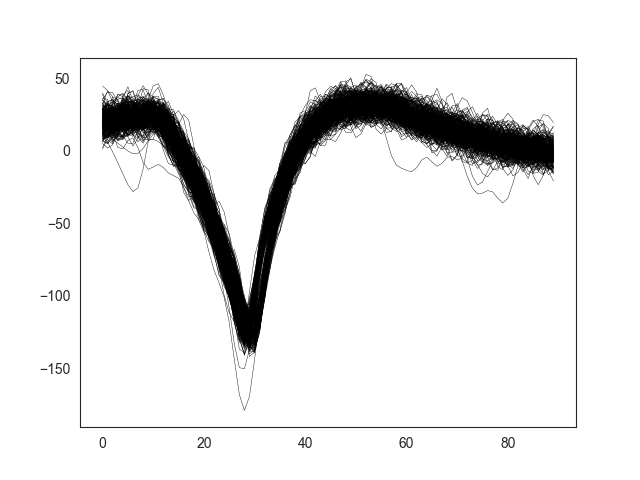

In [33]:
wf = st.postprocessing.get_unit_waveforms(recordings[0][1], recordings[0][2], ms_before=1, ms_after=2,
                                          save_as_features=True, verbose=True)
print(recordings[0][2].get_shared_unit_spike_feature_names())
print(wf[0].shape)
fig, ax = plt.subplots()
ax.plot(wf[0][:, 0, :].T, color='k', lw=0.3)
#ax.plot(wf[1][:, 0, :].T, color='r', lw=0.3)
#ax.plot(wf[2][:, 0, :].T, color='b', lw=0.3)
#ax.plot(wf[3][:, 0, :].T, color='k', lw=0.3)
print()

Extracting waveforms in chunks:   0%|                                                            | 0/1 [00:00<?, ?it/s]

Number of chunks: 1 - Number of jobs: 1


Extracting waveforms in chunks: 100%|####################################################| 1/1 [00:00<00:00,  1.11it/s]

['template']


<IPython.core.display.Javascript object>


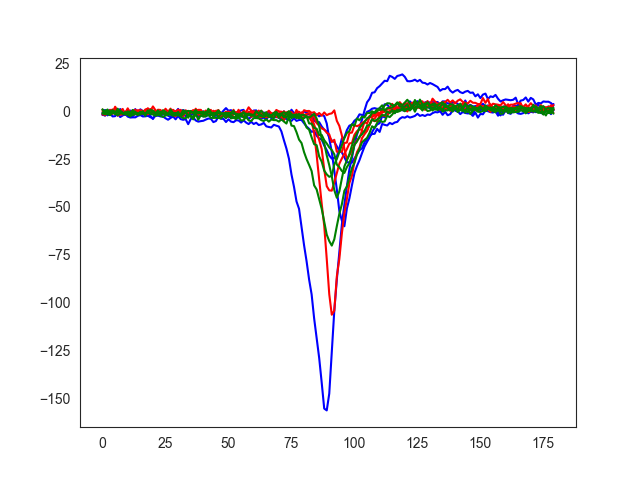

In [4]:
templates = st.postprocessing.get_unit_templates(recordings[0][1], recordings[0][2], max_spikes_per_unit=200,
                                                 save_as_property=True, verbose=True)
print(recordings[0][2].get_shared_unit_property_names())
fig, ax = plt.subplots()
ax.plot(templates[0].T, color='b')
ax.plot(templates[1].T, color='r')
ax.plot(templates[2].T, color='g')
print()

In [5]:
# These Methods prints Timeseries,Geometry,Spectrum,Spectogram,
# Raster,Isi Distribution and Correlograms for a list of recordings

def printTimeseries(recordings):
    
    for recording in recordings:  
        plot = sw.plot_timeseries(recording[1], trange=[0,5])
        plot.figure.suptitle(recording[0])
        
def printElectrodeGeometry(recordings):

    for recording in recordings:
        plot = sw.plot_electrode_geometry(recording[1])
        plot.figure.suptitle(recording[0])
        
def printSpectrum(recordings):
    
    for recording in recordings:
        plot = sw.plot_spectrum(recording[1])
        plot.figure.suptitle(recording[0])
        
def printSpectrogram(recordings):
    
    for recording in recordings:
        plot = sw.plot_spectrogram(recording[1], channel=0, nfft=2048)
        plot.figure.suptitle(recording[0])
        
def printRasters(recordings):
    
    for recording in recordings:
        plot = sw.plot_rasters(recording[2], sampling_frequency = recording[1].get_sampling_frequency())
        plot.figure.suptitle(recording[0])
        
def printIsiDistribution(recordings):
    
    for recording in recordings:
        plot = sw.plot_isi_distribution(recording[2], bins=10, window=1, 
                                 sampling_frequency = recording[1].get_sampling_frequency())
        plot.figure.suptitle(recording[0])
        
def printAutocorrelograms(recordings):

    for recording in recordings:
        plot = sw.plot_autocorrelograms(recording[2], bin_size=1, window=10, 
                                 sampling_frequency = recording[1].get_sampling_frequency())
        plot.figure.suptitle(recording[0])

def printCrosscorrelograms(recordings):
    
    for recording in recordings:
        plot = sw.plot_crosscorrelograms(recording[2], bin_size=0.1, window=5, 
                                  sampling_frequency = recording[1].get_sampling_frequency())
        plot.figure.suptitle(recording[0])

<IPython.core.display.Javascript object>


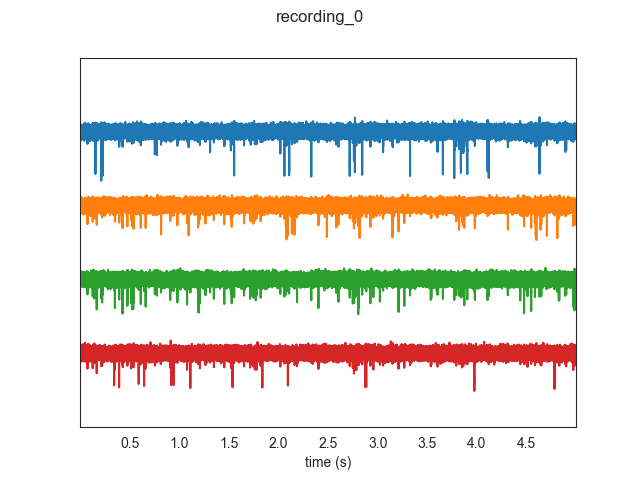

<IPython.core.display.Javascript object>


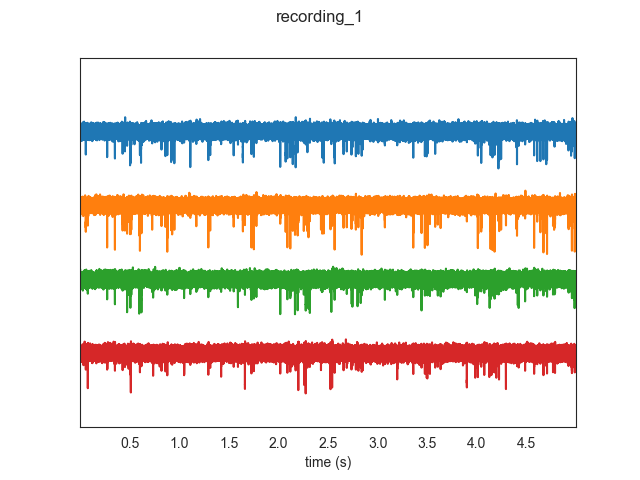

In [6]:
printTimeseries(recordings)

<IPython.core.display.Javascript object>


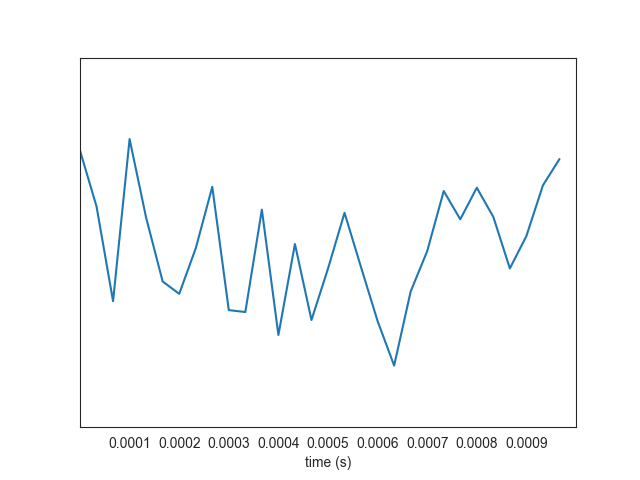

In [7]:
sw.plot_timeseries(recordings[0][1], channel_ids = [0] , trange=[0,0.001])

<IPython.core.display.Javascript object>


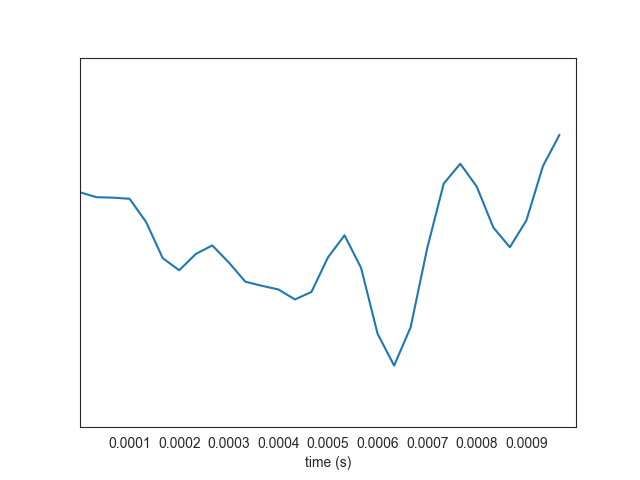

In [34]:
test = st.preprocessing.bandpass_filter(recordings[0][1])
sw.plot_timeseries(test, channel_ids = [0] , trange=[0,0.001])

In [ ]:
printElectrodeGeometry(recordings)

In [ ]:
printSpectrogram(recordings)

In [ ]:
printIsiDistribution(recordings)

In [ ]:
printAutocorrelograms(recordings)

In [ ]:
printCrosscorrelograms(recordings)

In [8]:
# These methods are for running the Spike Sorting for a list of recordings with all installed Spike Sorters,
# creating a list that contains all recordings and their sorters with sorting results
# You can also print the SorterList and some SorterData

def runSpikeSorting(recordings,working_folder):
    
    recording_list = list()
    for recording in recordings:
        recording_list.append(recording[1])
    
    spike_sorting = ss.run_sorters(sorter_list = ss.installed_sorters(),
                               recording_dict_or_list = recording_list,
                               working_folder = working_folder)
    
    return spike_sorting

def createSorterList(recordings,spike_sorting):
    
    sorter_list = list()
    
    for recording in recordings:
        
        sorters = list()
        
        for key in spike_sorting:
            
            if recording[0] == key[0]:
                
                sorters.append([key[1],spike_sorting[key]])
            
        sorter_list.append([recording,sorters])
        
    return sorter_list

def printSorterList(sorter_list):
    
    for sorter in sorter_list:
        print(sorter,"\n")
        
def printSorterData(sorter_list):
    
    for entry in sorter_list:

        print("-"*50,"\n")
        print(entry[0][0],"\n")
        print("-"*50,"\n")
        
        for sorter in entry[1]:
            
            print(sorter[0],"\n")
            sorting = sorter[1]
            recording = entry[0][1]
    
            snrs = st.validation.compute_snrs(sorting, recording)
            isi_violations = st.validation.compute_isi_violations(sorting, 
                                                          duration_in_frames=recording.get_num_channels())
            isolations = st.validation.compute_isolation_distances(sorting, recording)

            print('SNR', snrs,"\n")
            print('ISI violation ratios', isi_violations,"\n")
            print('Isolation distances', isolations, "\n"*2)

In [9]:
# This prints your installed Sorters
ss.installed_sorters()

['herdingspikes',
 'ironclust',
 'klusta',
 'spykingcircus',
 'tridesclous',
 'waveclus']

In [ ]:
# Runs all SpikeSorters for your recordings. Note that the working folder must not exist to run this method.
spike_sorting = runSpikeSorting(recordings,"working")

In [10]:
# Loads your working folder where your sorting results are saved. You dont need to run SpikeSorting every time.
spike_sorting = ss.collect_sorting_outputs("working")

In [11]:
# Creates and prints the SorterList
sorter_list = createSorterList(recordings,spike_sorting)
printSorterList(sorter_list)

[['recording_0', <spikeforest2_utils.autoextractors.autorecordingextractor.AutoRecordingExtractor object at 0x000002A5ED40EB50>, <spikeforest2_utils.autoextractors.autosortingextractor.AutoSortingExtractor object at 0x000002A5ED40E910>], [['herdingspikes', <spikeextractors.extractors.hs2sortingextractor.hs2sortingextractor.HS2SortingExtractor object at 0x000002A67CC7C220>], ['ironclust', <spikeextractors.extractors.mdaextractors.mdaextractors.MdaSortingExtractor object at 0x000002A67CCCA640>], ['klusta', <spikeextractors.extractors.klustaextractors.klustaextractors.KlustaSortingExtractor object at 0x000002A67CCD7160>], ['spykingcircus', <spikeextractors.extractors.spykingcircusextractors.spykingcircusextractors.SpykingCircusSortingExtractor object at 0x000002A67CD41F40>], ['tridesclous', <spikeextractors.extractors.tridescloussortingextractor.tridescloussortingextractor.TridesclousSortingExtractor object at 0x000002A67CD41700>], ['waveclus', <spikeextractors.extractors.waveclussortinge

In [12]:
# Prints some SorterData for every Recording 

printSorterData(sorter_list)

-------------------------------------------------- 

recording_0 

-------------------------------------------------- 

herdingspikes 

SNR [ 7.7326703 19.93344  ] 

ISI violation ratios [1.92434687e-08 0.00000000e+00] 

Isolation distances [1240.30809442  362.33981795] 


ironclust 

SNR [ 0.4827058  8.435564  19.881575  14.237815  10.375596   7.6509967
 13.288006  11.605542  10.015566   8.884786  14.472077 ] 

ISI violation ratios [8.43469277e-08 4.56000968e-08 9.19235725e-07 8.69276428e-07
 0.00000000e+00 1.79321955e-07 6.90873329e-08 4.58610410e-08
 0.00000000e+00 2.23205655e-08 1.76123254e-06] 

Isolation distances [207.12257331  86.71191791 289.56192689 106.49628892  79.58416881
  59.44975194  68.29869639  97.68483263  63.93747717  90.34441697
 155.25222309] 


klusta 

SNR [ 9.008325   8.879692  10.323859  14.403277  19.545752   1.3422853
 13.141188  19.37272    8.741432  14.125216   9.923999  11.387511
  7.6087155] 

ISI violation ratios [1.27391781e-05 0.00000000e+00 0.0000000

KeyboardInterrupt: 

In [13]:
# These are Functions to print Graphs of the Unit Waveforms, Amplitude Distribution,
# Amplitude Timeseries and PCA Features for a sorterlist

def printUnitWaveforms(sorter_list):
    
    for rec in sorter_list:       
        recording = rec[0][1]        
        for sorter in rec[1]:
            sorting = sorter[1] 
            plot = sw.plot_unit_waveforms(recording, sorting, max_spikes_per_unit=100)
            plot.figure.suptitle(rec[0][0]+" : "+sorter[0])
            
def printAmplitudeDistribution(sorter_list):

    for rec in sorter_list:       
        recording = rec[0][1]        
        for sorter in rec[1]:
            sorting = sorter[1]   
            plot = sw.plot_amplitudes_distribution(recording, sorting, max_spikes_per_unit=300)
            plot.figure.suptitle(rec[0][0]+" : "+sorter[0])
    
def printAmplitudeTimeseries(sorter_list):

    for rec in sorter_list:       
        recording = rec[0][1]        
        for sorter in rec[1]:
            sorting = sorter[1]   
            plot = sw.plot_amplitudes_timeseries(recording, sorting, max_spikes_per_unit=300)
            plot.figure.suptitle(rec[0][0]+" : "+sorter[0])
    
def printPCAFeatures(sorter_list):
    
    for rec in sorter_list:       
        recording = rec[0][1]        
        for sorter in rec[1]:
            sorting = sorter[1] 
            plot = sw.plot_pca_features(recording, sorting, colormap='rainbow', nproj=3, max_spikes_per_unit=100)
            plot.figure.suptitle(rec[0][0]+" : "+sorter[0])

<IPython.core.display.Javascript object>


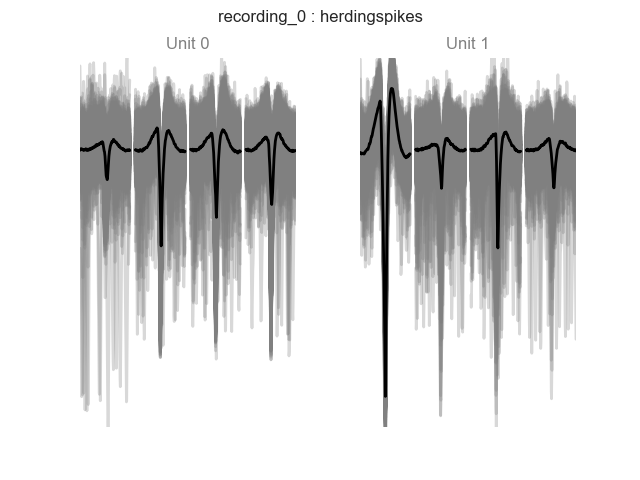

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


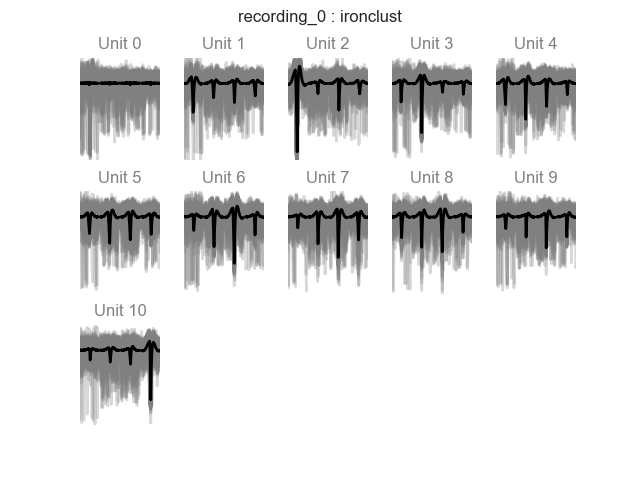

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


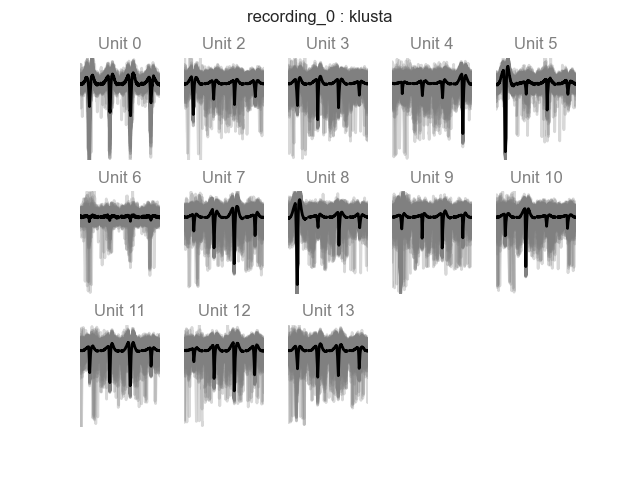

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


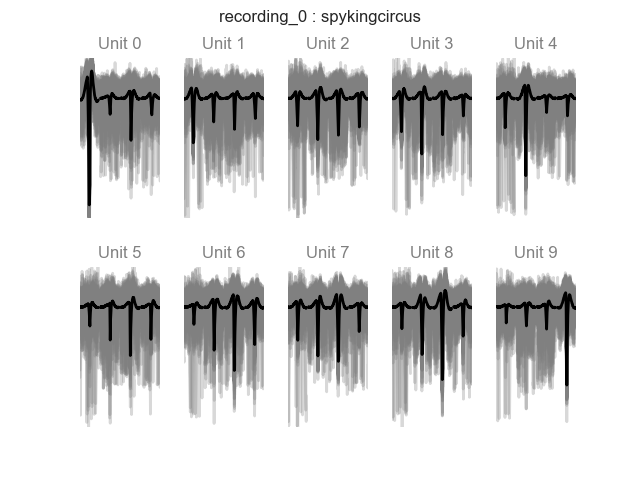

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


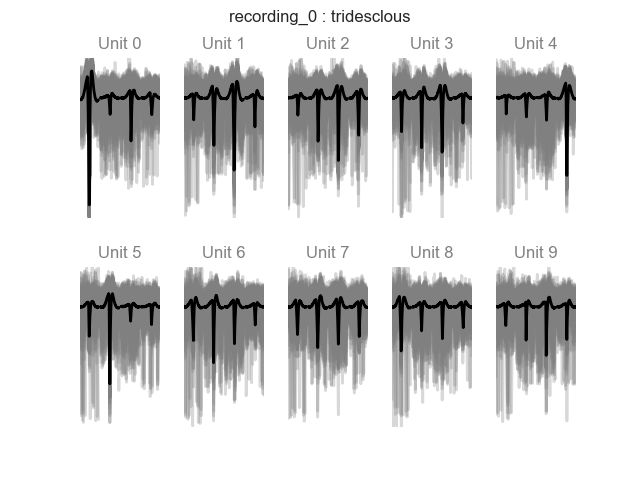

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


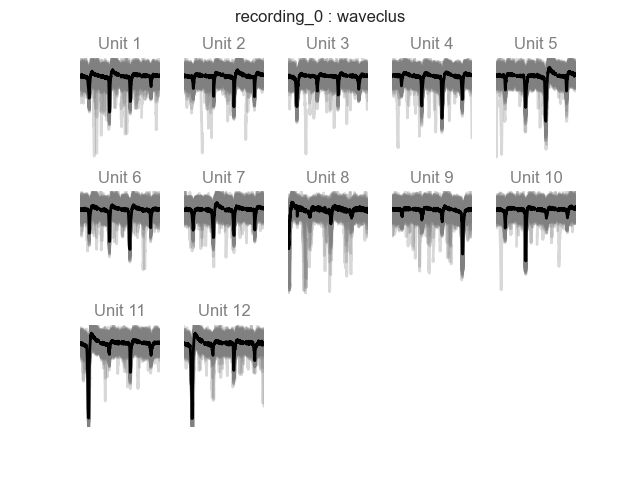

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


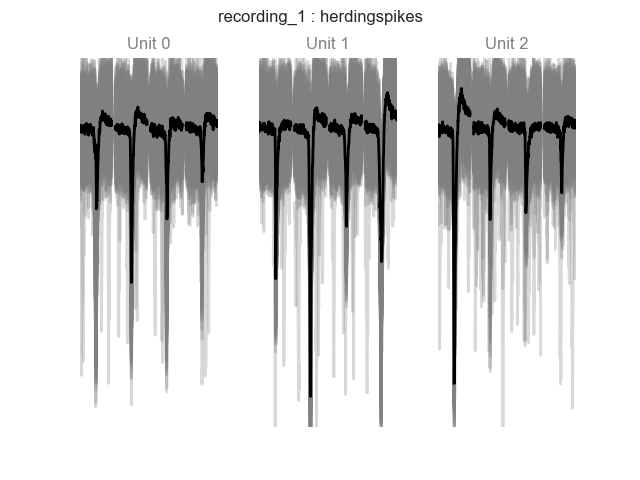

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


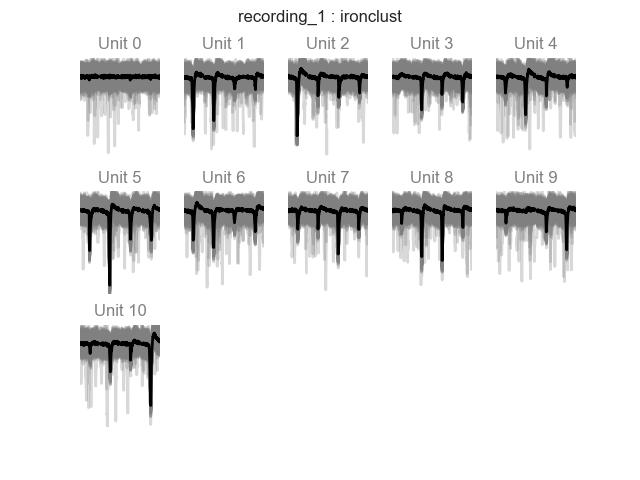

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


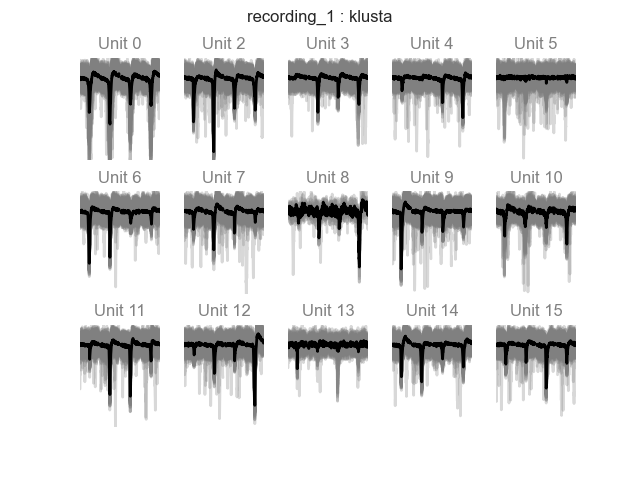

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


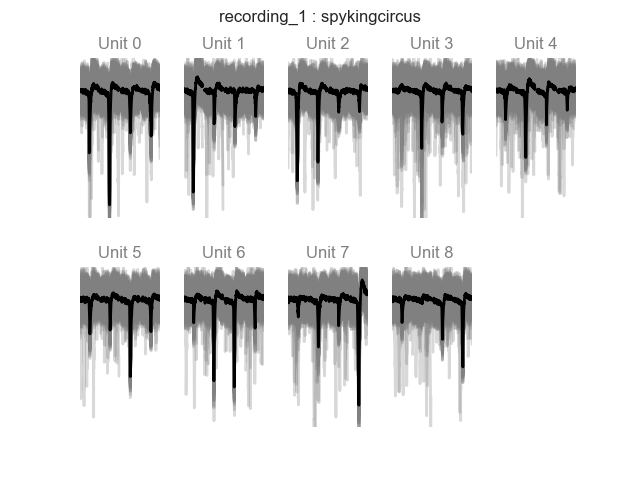

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


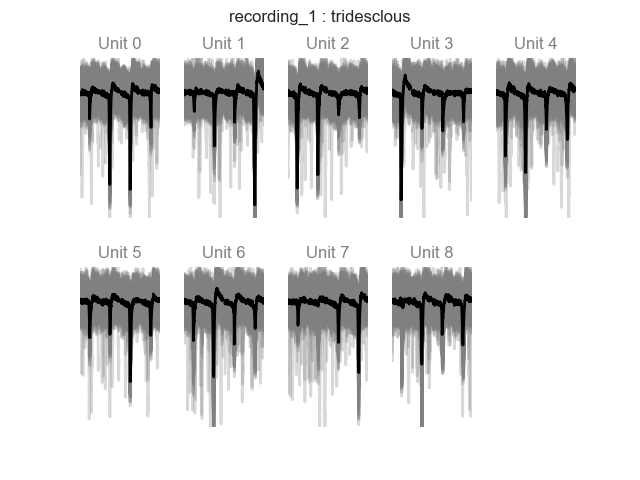

{'max_spikes_per_unit': 100}


<IPython.core.display.Javascript object>


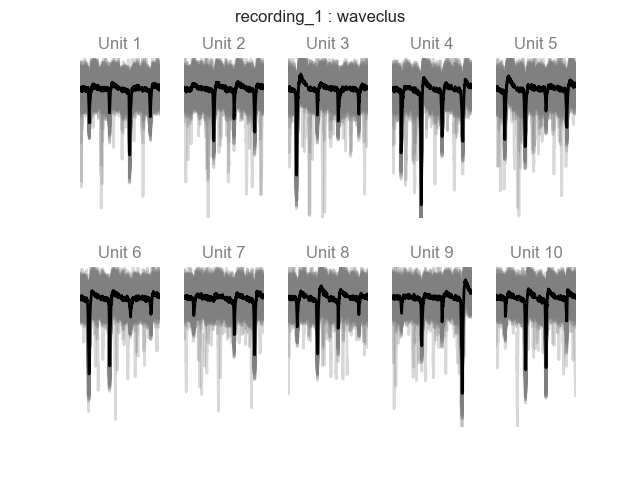

{'max_spikes_per_unit': 100}


In [14]:
printUnitWaveforms(sorter_list)

In [ ]:
printAmplitudeDistribution(sorter_list)

In [ ]:
printAmplitudeTimeseries(sorter_list)

In [ ]:
printPCAFeatures(sorter_list)

In [15]:
def compareWithGroundTruth(sorter_list):
    
    for rec in sorter_list:       
        sorting_true = rec[0][2]
        for sorter in rec[1]:
            sorting = sorter[1]
            comp = sc.compare_sorter_to_ground_truth(sorting_true,sorting)
            w_comp = sw.plot_confusion_matrix(comp)
            w_comp.figure.suptitle(rec[0][0] + " : " + sorter[0] + " - Confusion Matrix")
            w_agr = sw.plot_agreement_matrix(comp) 
            w_agr.figure.suptitle(rec[0][0] + " : " + sorter[0] + " - Agreement Matrix")

def printPerformance(sorter_list):
    
    for rec in sorter_list:
        recording = rec[0][1]
        sorting_true = rec[0][2]
        for sorter in rec[1]:
            sorting = sorter[1]   
            snrs = st.validation.compute_snrs(sorting_true, recording, save_as_property=True)
            comp = sc.compare_sorter_to_ground_truth(sorting_true,sorting)
            w_perf_acc = sw.plot_sorting_performance(comp, property_name='snr', metric='accuracy')
            w_perf_acc.figure.suptitle(rec[0][0] + " : " + sorter[0])
            w_perf_rec = sw.plot_sorting_performance(comp, property_name='snr', metric='recall')
            w_perf_rec.figure.suptitle(rec[0][0] + " : " + sorter[0])
            w_perf_precision = sw.plot_sorting_performance(comp, property_name='snr', metric='precision')
            w_perf_precision.figure.suptitle(rec[0][0] + " : " + sorter[0])  
            
def compareSorters(rec):
    
    for sorter1 in rec[1]:
        for sorter2 in rec[1]:
            if sorter1[0] != sorter2[0]:
                cmp = sc.compare_two_sorters(sorting1=sorter1[1], 
                                             sorting2=sorter2[1],
                                             sorting1_name=sorter1[0],
                                             sorting2_name=sorter2[0])
                plot = sw.plot_agreement_matrix(cmp)
                plot.figure.suptitle(rec[0][0] + " : " + sorter1[0] + " - " + sorter2[0])
                print(cmp.match_event_count)
                print(cmp.agreement_scores)

def compareMultipleSorters(sorter_list):
    
    for rec in sorter_list:
        sorters = list()
        for sorter in rec[1]:
            sorters.append(sorter[1])
        multicomp = sc.compare_multiple_sorters(sorters)
        w_multi = sw.plot_multicomp_graph(multicomp, edge_cmap='coolwarm', node_cmap='viridis', draw_labels=False,
                                  colorbar=True)
        w_multi.figure.suptitle(rec[0][0])

<IPython.core.display.Javascript object>


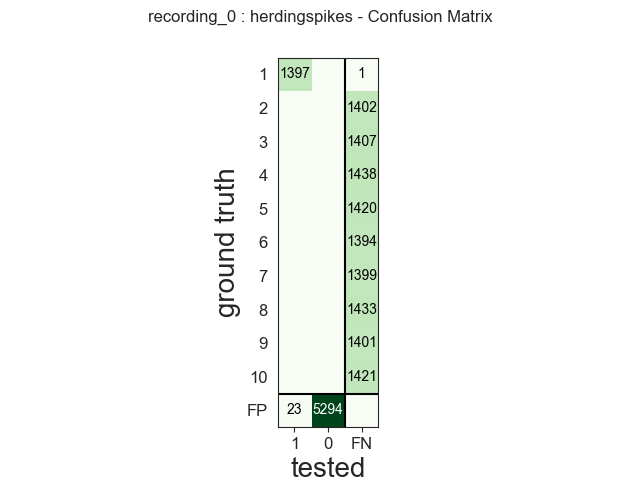

<IPython.core.display.Javascript object>


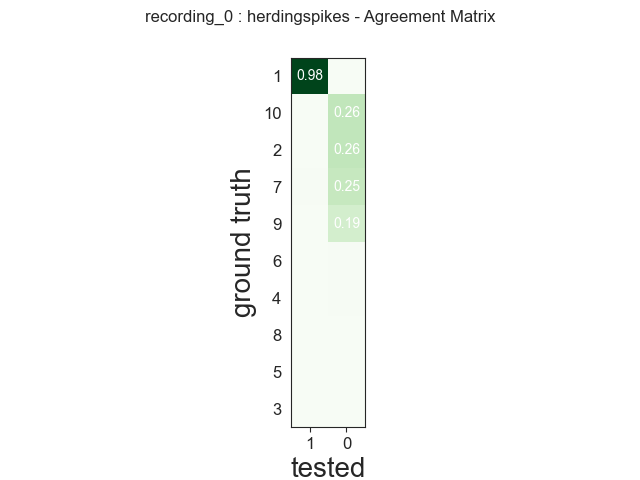

<IPython.core.display.Javascript object>


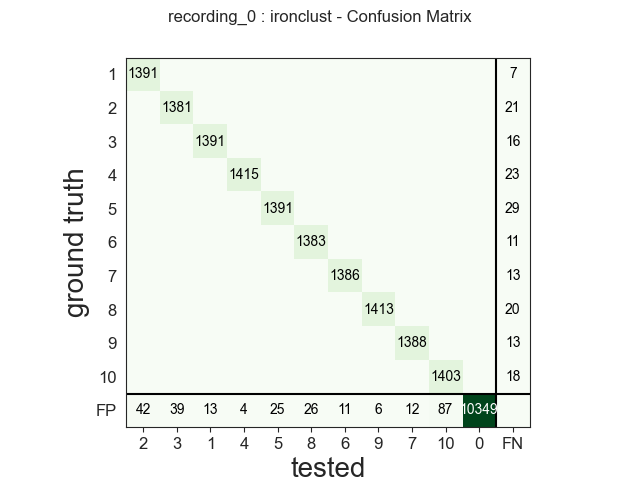

<IPython.core.display.Javascript object>


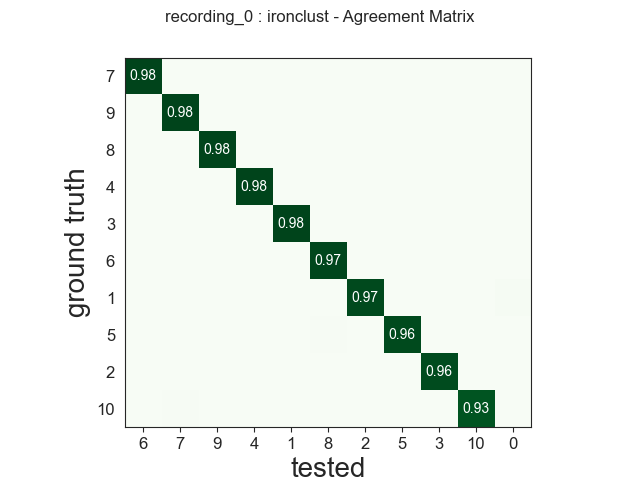

c:\spike_sorting_software\venv\lib\site-packages\spikewidgets\widgets\basewidget.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.figure = plt.figure()


<IPython.core.display.Javascript object>


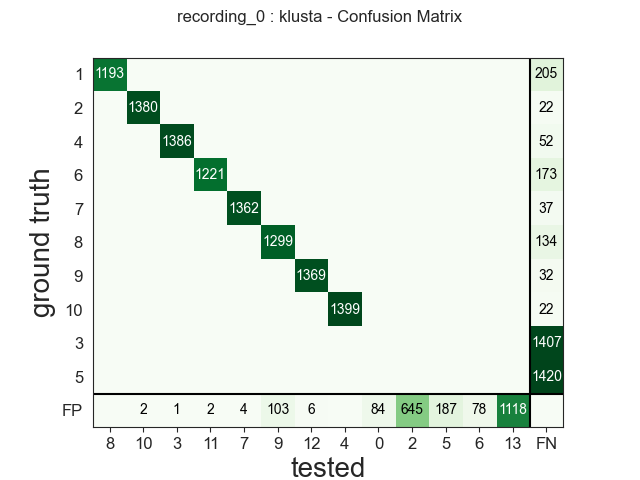

<IPython.core.display.Javascript object>


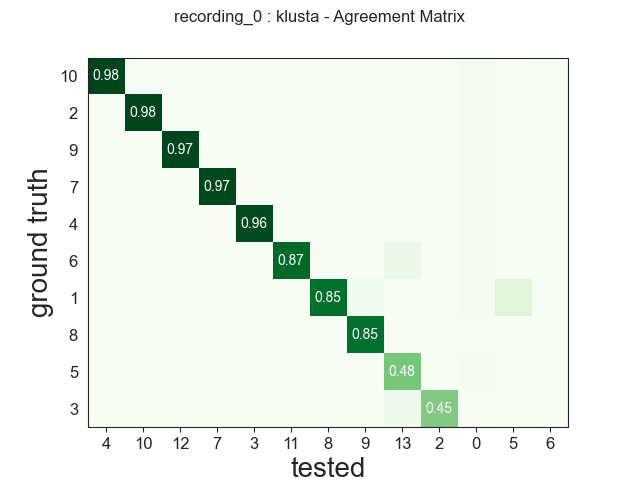

<IPython.core.display.Javascript object>


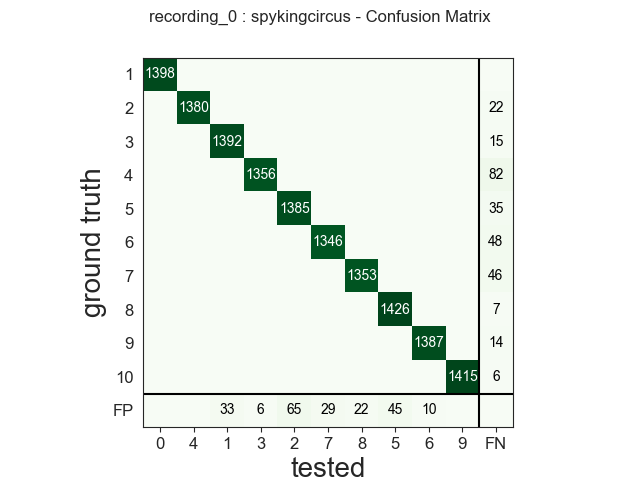

<IPython.core.display.Javascript object>


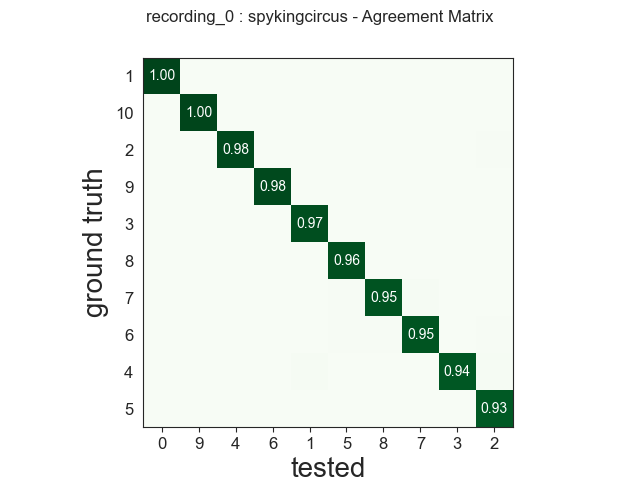

<IPython.core.display.Javascript object>


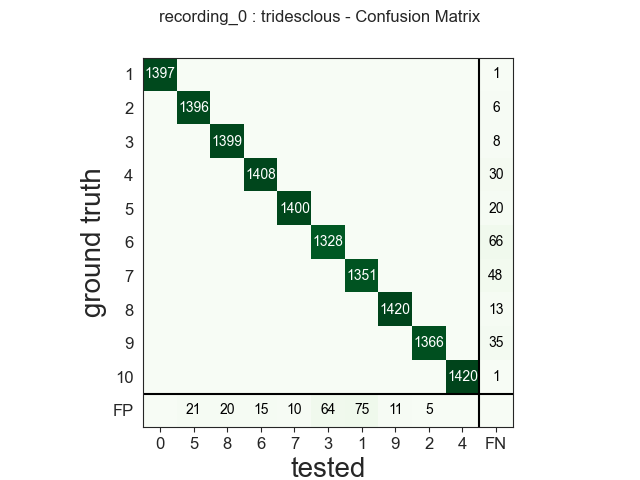

<IPython.core.display.Javascript object>


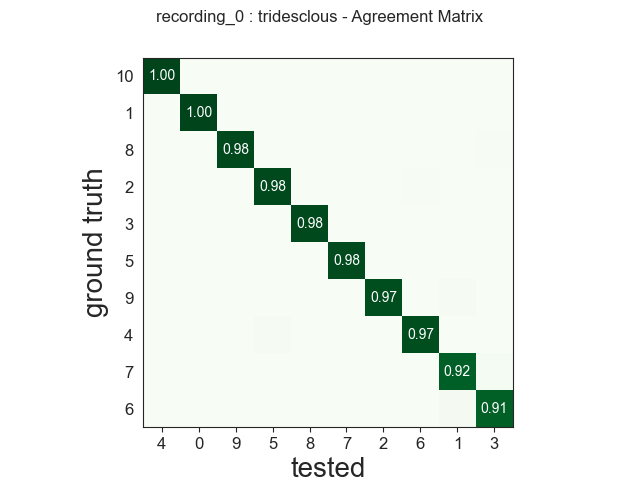

<IPython.core.display.Javascript object>


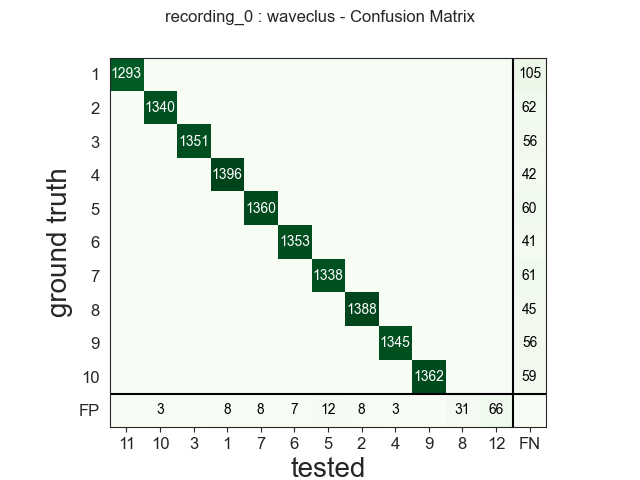

<IPython.core.display.Javascript object>


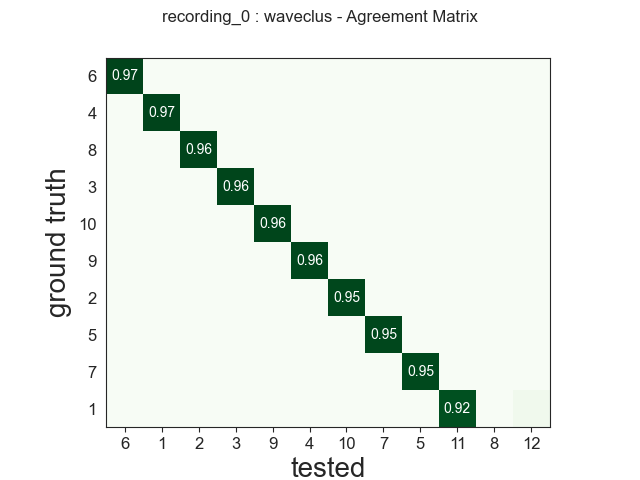

<IPython.core.display.Javascript object>


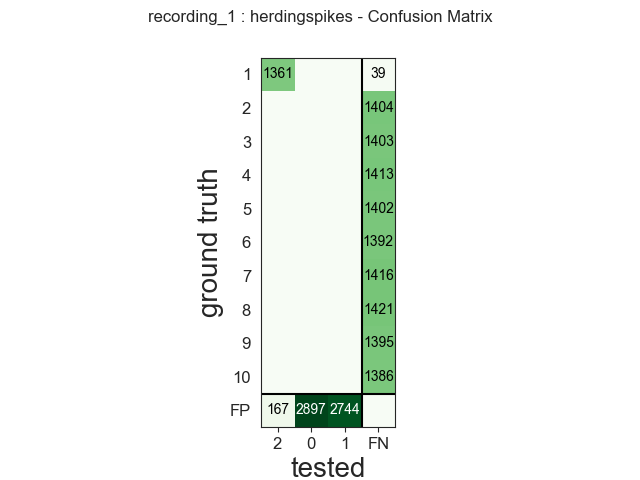

<IPython.core.display.Javascript object>


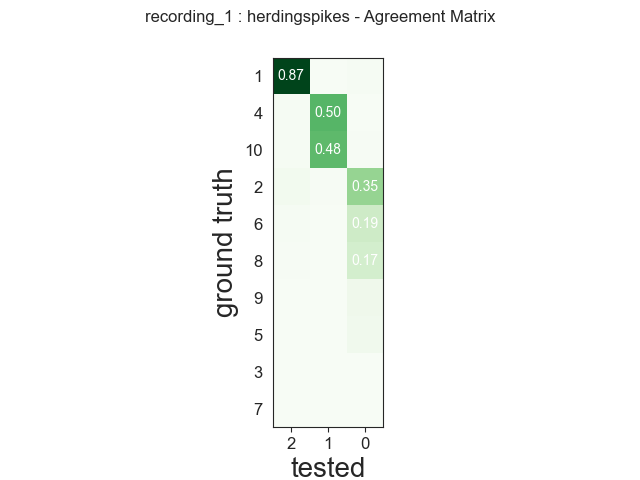

<IPython.core.display.Javascript object>


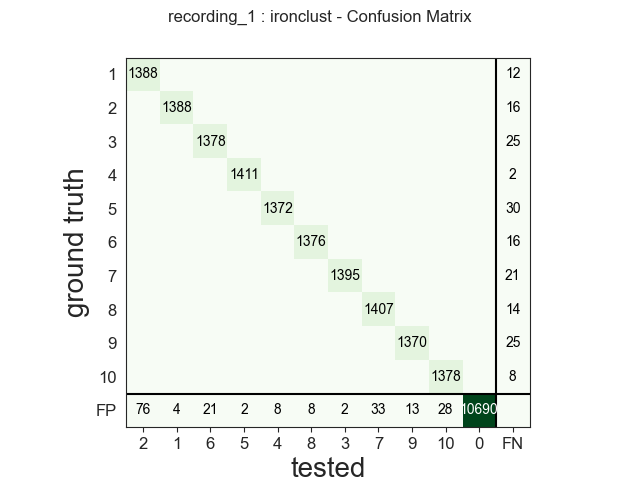

<IPython.core.display.Javascript object>


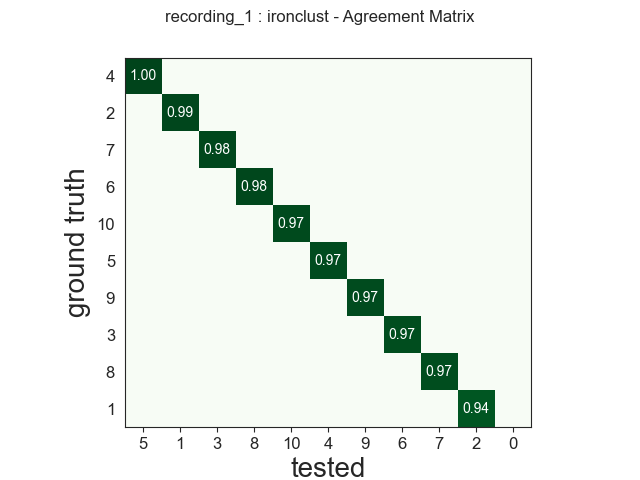

<IPython.core.display.Javascript object>


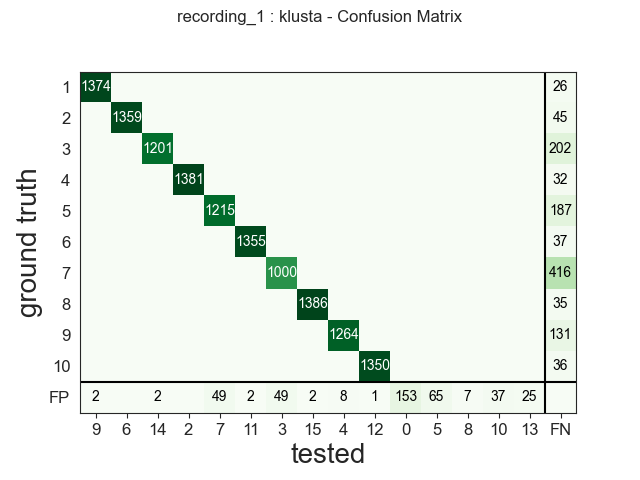

<IPython.core.display.Javascript object>


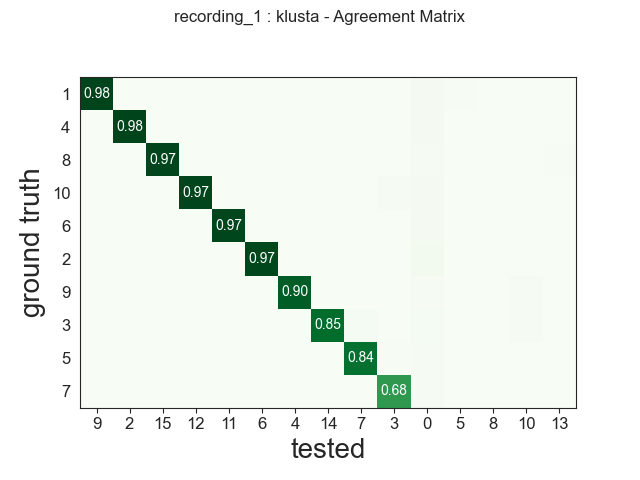

<IPython.core.display.Javascript object>


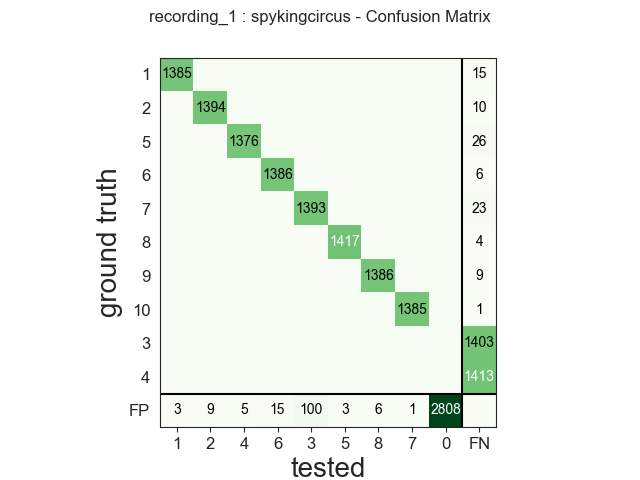

<IPython.core.display.Javascript object>


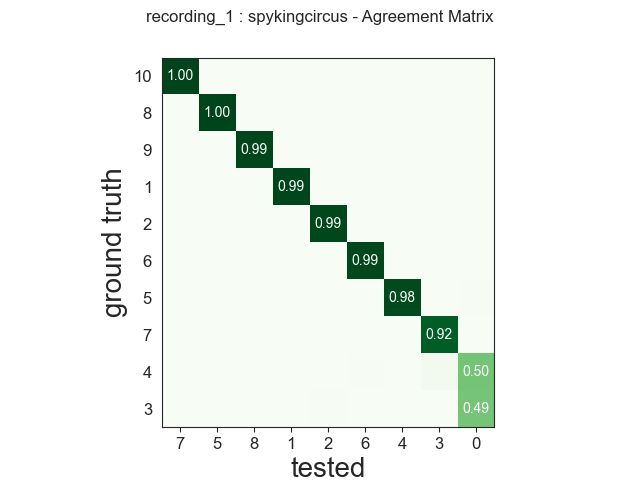

<IPython.core.display.Javascript object>


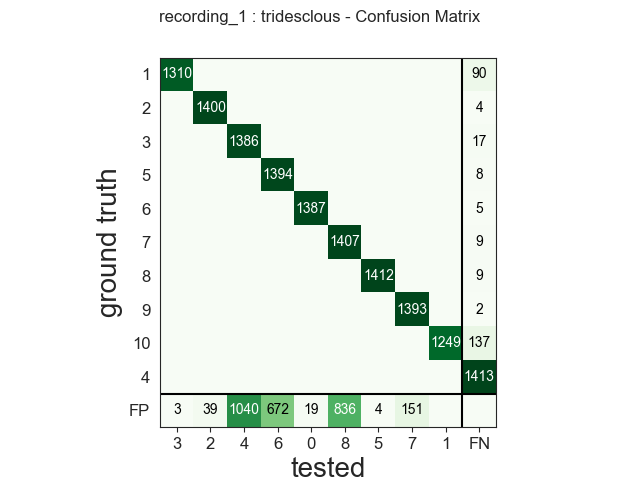

<IPython.core.display.Javascript object>


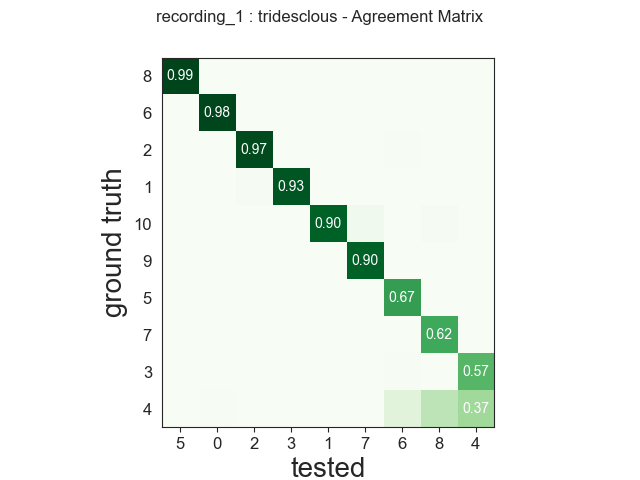

<IPython.core.display.Javascript object>


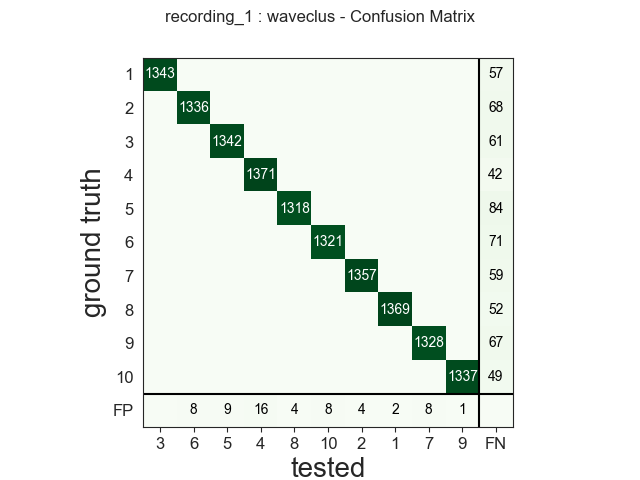

<IPython.core.display.Javascript object>


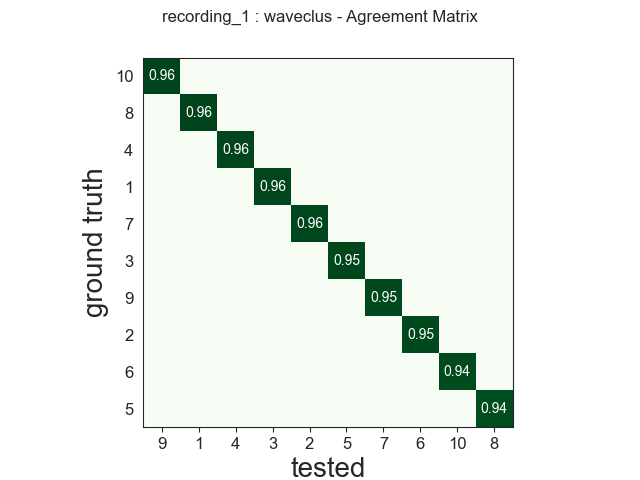

In [16]:
compareWithGroundTruth(sorter_list)

In [ ]:
printPerformance(sorter_list)

In [ ]:
compareSorters(sorter_list[0])

In [ ]:
compareSorters(sorter_list[1])

In [ ]:
compareMultipleSorters(sorter_list)

In [ ]:
#Define Autoencoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

autoencoder = Sequential(
    [
        Input(shape=(fs,)),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(8,activation='relu'),
        Dense(16,activation='relu'),
        Dense(32,activation='relu'),
        Dense(fs,activation='sigmoid')
    ]
)

autoencoder.summary()

In [ ]:
# Filter Data

recording = st.preprocessing.bandpass_filter(recording, cache_to_file=True)

In [ ]:
# Get Data of Recording

recording_data = recording.get_traces(channel_ids=channel_ids,start_frame=0,end_frame=fs)

print(recording_data)

print("Number of Arrays :", len(recording_data))
print("Length of one Array :", len(recording_data[0,:]))

In [ ]:
# Train Autoencoder

autoencoder.compile(optimizer='adam',
                    loss = 'mae',
              metrics=['accuracy'])


autoencoder.fit(recording_data,recording_data, epochs=5)

